In [1]:
#importing libraries and dataset
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [2]:
#finding shape of the dataset
data.shape

(4998, 141)

In [3]:
#splitting training and testing dataset
features = data.drop(140, axis=1)
target = data[140]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [4]:
#scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [5]:
#creating autoencoder subclass by extending Model class from keras
class AutoEncoder(Model):
  def __init__(self, output_units, ldim=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(ldim, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [6]:
#model configuration
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
epochs = 20

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0129 - mse: 0.0291 - val_loss: 0.0147 - val_mse: 0.0345
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0126 - mse: 0.0285 - val_loss: 0.0145 - val_mse: 0.0339
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0123 - mse: 0.0278 - val_loss: 0.0140 - val_mse: 0.0327
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0115 - mse: 0.0258 - val_loss: 0.0132 - val_mse: 0.0310
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0101 - mse: 0.0227 - val_loss: 0.0126 - val_mse: 0.0294
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0085 - mse: 0.0188 - val_loss: 0.0131 - val_mse: 0.0303
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0071 - mse: 0.0157 - val_loss: 0.0129 - val_mse: 0.0298
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0063 - mse: 0.0139 - val_loss: 0.0122 - val_mse: 0.0282
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0057 - mse: 0.0127 

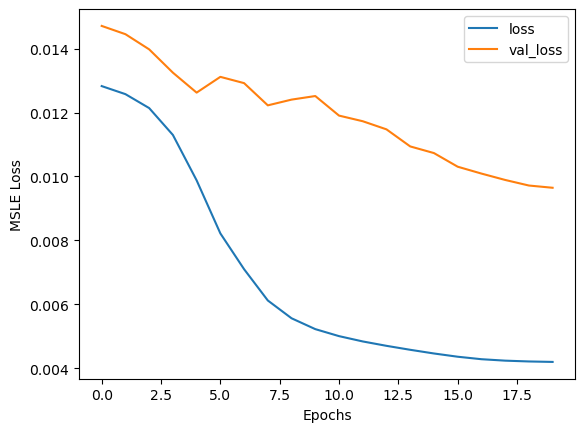

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [8]:
#finding threshold for anomaly and doing predictions
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
   + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Threshold: 0.009626202216029976


In [9]:
#getting accuracy score
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.948

In [ ]:
# Step 1: Import the required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the dataset
url = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(url)

#print(data.head())
print(data.columns)

# Separate features and labels (0 = normal, 1 = anomaly)
X = data.drop(columns=[141])  # Drop the 'Class' column for features
y = data[141]  # Target variable

# Continue with scaling, splitting, and the rest of the model setup as previously defined.


# Scale the data for better training performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Build the autoencoder model
# Encoder
input_layer = Input(shape=(X_train.shape[1],))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)

# Latent representation
latent_space = Dense(8, activation="relu")(encoder)

# Decoder
decoder = Dense(16, activation="relu")(latent_space)
decoder = Dense(32, activation="relu")(decoder)
decoder = Dense(64, activation="relu")(decoder)
output_layer = Dense(X_train.shape[1], activation="sigmoid")(decoder)

# Step 4: Compile the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

# Step 5: Train the model
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          validation_split=0.2,
                          shuffle=True)

# Step 6: Evaluate the model
# Reconstruct the test set
reconstructions = autoencoder.predict(X_test)

# Compute the reconstruction loss for each sample
reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)  # top 5% as anomalies

# Detect anomalies
y_pred = [1 if error > threshold else 0 for error in reconstruction_errors]

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Dataset shape: (4998, 141)
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0110 - mse: 0.0247 - val_loss: 0.0132 - val_mse: 0.0308
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0107 - mse: 0.0243 - val_loss: 0.0131 - val_mse: 0.0305
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0104 - mse: 0.0236 - val_loss: 0.0128 - val_mse: 0.0299
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mse: 0.0223 - val_loss: 0.0124 - val_mse: 0.0289
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0089 - mse: 0.0202 - val_loss: 0.0120 - val_mse: 0.0280
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076 - mse: 0.0172 - val_loss: 0.0124 - val_mse: 0.0286
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mse: 0.0152 - val_loss: 0.0117 - val_mse: 0.0271
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0056 - mse: 0.0127 - val_loss: 0.0112 - val_mse: 0.0260
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - lo

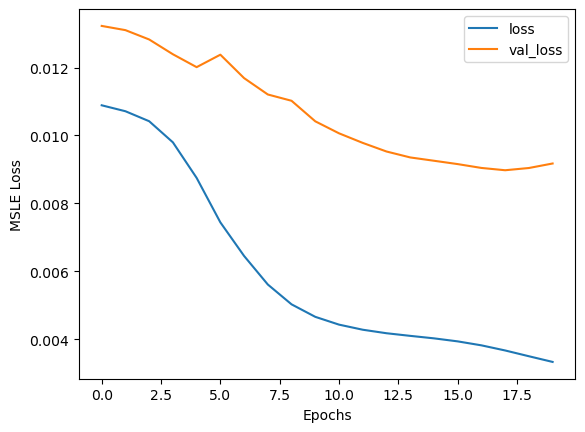

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.1240
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold: 0.007392017781508346
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.959

In [22]:
#importing libraries and dataset
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Load dataset
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

# Finding shape of the dataset
print("Dataset shape:", data.shape)

# Splitting training and testing dataset
features = data.drop(140, axis=1)  # Use column index 140 as the target
target = data[140]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

# Filter normal samples (labeled as 1) for training the autoencoder
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

# Scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

# Creating autoencoder subclass by extending Model class from keras
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(ldim, activation='relu')
        ])
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])
  
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Model configuration
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer=Adam(learning_rate=0.001))
epochs = 20

# Training the model
history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

# Define a function to get predictions based on a reconstruction error threshold
def get_predictions(model, data, threshold):
    # Reconstruct input data
    reconstructions = model.predict(data)
    # Calculate the mean squared error for each sample
    reconstruction_errors = tf.keras.losses.mse(data, reconstructions)
    # Classify samples as anomalies if the error exceeds the threshold
    return [1 if error > threshold else 0 for error in reconstruction_errors]

# Set a threshold for anomaly detection based on the reconstruction error distribution
reconstructions = model.predict(x_train_scaled)
reconstruction_errors = tf.keras.losses.mse(x_train_scaled, reconstructions)
threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)

# Getting predictions and calculating accuracy score
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy = accuracy_score(predictions, y_test)

print(f"Accuracy: {accuracy:.4f}")

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

#getting accuracy score
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)